# Compensador por Avanço - Raphael Frazão Bach e Silva



\begin{equation}
FTMA = \dfrac{2s + 0.1017}{s(s^2+0,1s+4)}
\end{equation}
Sujeito a :

* $K_{v} = 4s^{-1}$
* Margem de Fase pelo menos 50º
* Margem de Ganho de 8dB






In [ ]:
!pip install control
from control.matlab import *
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
plotly.__version__
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 7.0 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=de5656f9550ae23c8445c158a3780a138ea3ce840a1e64a675df99b5eedf2573
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control



   2 s + 0.1017
-------------------
s^3 + 0.1 s^2 + 4 s

Kc*alfa= 157.32546705998033
inf 0.16183527176326606 nan 17.850690385586905


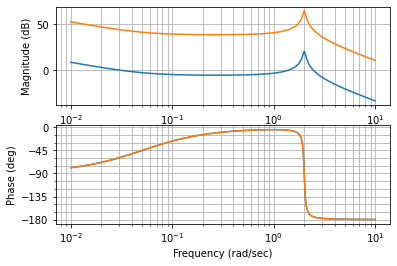

In [ ]:
#verificando sistema não compensado

num= [2 , 0.1017]
den = [1, 0.1, 4, 0]
gs = tf(num,den)
print(gs)
#[mg, mf, wcf, wcg]=margin(gs)
#print( mg, mf, wcf, wcg)
bode(gs)
np.array
#sistema parcialmente compensado queremos kv = 4, temos o ess do sistem s=>0 = 0.1017/4
k=4/(0.1017/4)
print(f"Kc*alfa= {k}")
gpc=k*gs
bode(gpc)
np.array
[mgc, mfc, wcfc, wcgc]=margin(gpc)
print( mgc, mfc, wcfc, wcgc)


In [ ]:
#descobrindo paramentros kc alfa e t
import control

import numpy as np
MF = mfc
phi_m = 50 - MF +6
phi_m_rad= phi_m*np.pi/180
alpha =(1 - np.sin(phi_m_rad))/(1 + np.sin(phi_m_rad))
print(f"alfa= {alpha}")

desloc = 1/np.sqrt(alpha)
deslocdb = 20*np.log10(1/np.sqrt(alpha))

MG , MF , wcf , wcg2 = control.margin(desloc*k*gs)

#print(f"frequencia de cruzamento de ganho= {wcg}")
T = 1/(np.sqrt(alpha)*wcg2)
print(f"T= {T}")

Kc=k/alpha
print(f"Kc= {Kc}")

alfa= 0.09441831662031971
T= 0.10150224199075238
Kc= 1666.2600297421782


inf 55.92669369146665 nan 32.0624155334809

         31.94 s^2 + 316.3 s + 16
-------------------------------------------
0.009584 s^4 + 1.001 s^3 + 0.1383 s^2 + 4 s



<function numpy.array>

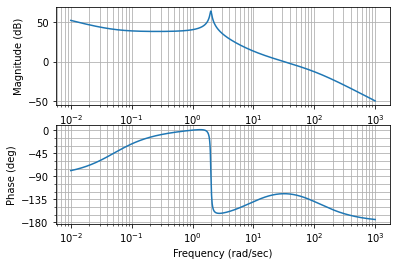

In [ ]:
#@title
#projeto do compensador
num= [k*T,k]
den= [T*alpha,1]

gcom=control.tf(num,den)

Gsistema=gs*gcom
[mg1, mf1, wcf1, wcg1]=margin(Gsistema)
print( mg1, mf1, wcf1, wcg1)
print(Gsistema)
bode(Gsistema)
np.array




<function matplotlib.pyplot.show>

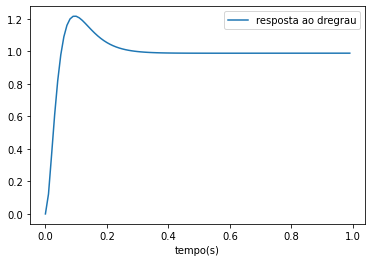

In [ ]:
#resposta ao degrau unitario
import matplotlib.pyplot as plt
#função de tranferencia de malha fechada
Hs=Gsistema/(1+Gsistema)
time_simulation=np.arange(0,1,0.01 )
[xout,yout] = control.step_response(Hs,time_simulation)


plt.figure()
plt.plot(xout,yout)
plt.xlabel('tempo(s)')
plt.legend(['resposta ao dregrau'])
plt.show



/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcond=1.52657e-22): result may not be accurate.
  return solve(Q, P)


<function matplotlib.pyplot.show>

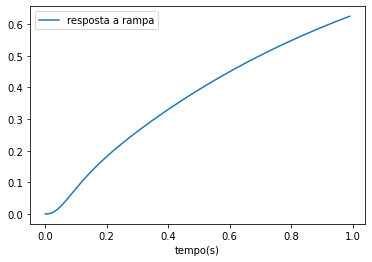

In [ ]:
#resposta a rampa unitaria
#print(Hs)
num=[0.3061,35,321.1,187.5,1267,64,0]
den=[0.00009185,0.01919,1.311,35.35,329.2,188.6,1283,64,0,0]
rampa=control.tf(num,den)
rampamf=rampa/(1+rampa)
#print(rampa)
time_simulation=np.arange(0,1,0.01 )
[xout,yout] = control.step_response(rampamf,time_simulation)


plt.figure()
plt.plot(xout,yout)
plt.xlabel('tempo(s)')
plt.legend(['resposta a rampa'])
plt.show